In [6]:
from model_2 import *
from msb import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pickle
from sklearn.model_selection import ParameterGrid

In [7]:
# Initialise Parameters

noise_levels = np.logspace(-6, np.log10(0.5), 30)
param_grid_dict = {'s': [0.01, 0.03,0.05, 0.1], 'tau':[5,10,100,200,500], 'mu':np.logspace(np.log10(0.00004),np.log10(0.003),5)}
param_grid = list(ParameterGrid(param_grid_dict))

genotype_names_3 = []
for i in range(3):
    for j in range(3):
        for k in range(5):
            genotype_names_3.append((i,j,k))
            
genotype_names_2 = []
for i in range(3):
    for j in range(2):
        for k in range(5):
            genotype_names_2.append((i,j,k))

In [8]:
all_delta = {}

for delta in [0.5]:

    results_msb = []

    #for i in range(len(param_grid)):
    for i in range(8):
        print(i)
        msb_pop = [msb_simulation(genotype_names_3, 'MSB', param_grid[i]['s'], -1, param_grid[i]['mu'], param_grid[i]['tau'], noise, noise, delta, 3) for noise in noise_levels]
        results_msb.append(msb_pop)
        
    all_delta[delta] = results_msb

0
1
2
3
4
5
6
7


In [9]:
def mutator_single_mut(nmrates, genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == nmrates-1:
            p += pop_vec[g]
    return(p)

def transient_single_mut(nmrates, genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 1:
            p += pop_vec[g]
    return(p)

def baseline_single_mut(nmrates, genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 0:
            p += pop_vec[g]
    return(p)

def calculate_adaptation_rate(mu, tau, nmrates, genotypes_names, pop_vec):
    mrates = np.logspace(np.log10(mu), np.log10(tau*mu), nmrates)
    q = 0
    for g in range(len(genotypes_names)):
        if genotypes_names[g][2] == 0 and genotypes_names[g][0] == 1:
            q += np.exp(-mrates[genotypes_names[g][1]])*mrates[genotypes_names[g][1]]*pop_vec[g]
            
    return(q)

def pM(nm, genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if genotypes_names[g][1] == nm:
            p += pop_vec[g]
    return(p)

def calc_probability(mu, tau, m1, M1):
    
    from_m1 = mu * (1/5000) * np.array(m1) * np.exp(-mu)
    from_M1 = mu*tau* (1/5000)*np.array(M1)* np.exp(-tau*mu)
    
    return(from_m1 + from_M1)

def calc_probability_transition(mu, tau, m1, M1, t1):
    
    mrates = np.logspace(np.log10(mu), np.log10(tau*mu), 3)
    
    from_m1 = mrates[0]*(1/5000)*np.array(m1) * np.exp(-mrates[0])
    from_t1 = mrates[1]*(1/5000)*np.array(t1) * np.exp(-mrates[1])
    from_M1 = mrates[2]* (1/5000)*np.array(M1)* np.exp(-mrates[2])
    
    return(from_m1 + from_t1 + from_M1)

In [10]:
with open('results_MSB_paramgrid_JUNE.pkl', 'rb') as f:
    results_two_mrates = pickle.load(f)[1]

In [11]:
param = 6

In [12]:
param_grid[6]

{'mu': 4.000000000000001e-05, 's': 0.03, 'tau': 10}

In [13]:
M1 = [mutator_single_mut(2, genotype_names_2, results_two_mrates[param][sr]['pop']) for sr in range(len(noise_levels))]
m1 = [baseline_single_mut(2, genotype_names_2, results_two_mrates[param][sr]['pop']) for sr in range(len(noise_levels))]

appearance = [calc_probability(param_grid[6]['mu'], param_grid[6]['tau'], m1[i], M1[i])*float(10000000) for i in range(len(noise_levels))]
adaptation = [appearance[i]*((2*0.03*5)) for i in range(30)]

In [14]:
M1_t = [mutator_single_mut(3, genotype_names_3, results_msb[param][sr]['pop']) for sr in range(len(noise_levels))]
m1_t = [baseline_single_mut(3, genotype_names_3, results_msb[param][sr]['pop']) for sr in range(len(noise_levels))]
t1_t = [transient_single_mut(3, genotype_names_3, results_msb[param][sr]['pop']) for sr in range(len(noise_levels))]

appearance_t = [calc_probability_transition(param_grid[6]['mu'], param_grid[6]['tau'], m1_t[i], M1_t[i],t1_t[i])*float(10000000) for i in range(len(noise_levels))]
adaptation_t = [appearance_t[i]*((2*0.03*5)) for i in range(30)]

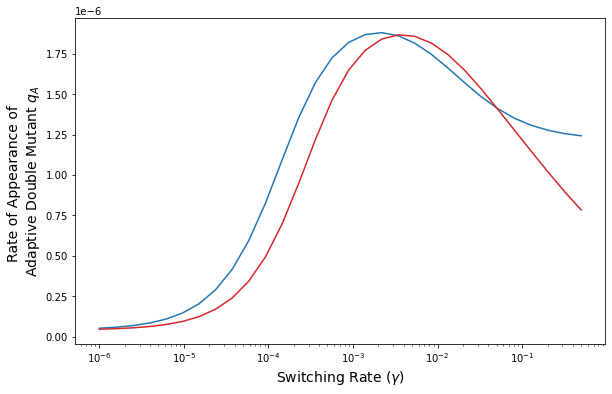

In [18]:
plt.subplots(figsize = (9.5,6))
#plt.plot(noise_levels, adaptation, c = 'C0')
#plt.plot(noise_levels, adaptation_t, c = 'C3')
plt.plot(noise_levels, appearance, c = 'C0')
plt.plot(noise_levels, appearance_t, c = 'C3')
plt.xscale('log')
#plt.title('Delta = ' + str(d), fontsize = 15)
plt.xlabel('Switching Rate ($\gamma$)', fontsize = 14)
plt.ylabel('Rate of Appearance of \nAdaptive Double Mutant $q_A$', fontsize = 14)
plt.savefig('transition_mrate_28MAR.jpg', dpi = 400, bbox_inches = 'tight')
#plt.ylim(0,7e-7)
plt.show()

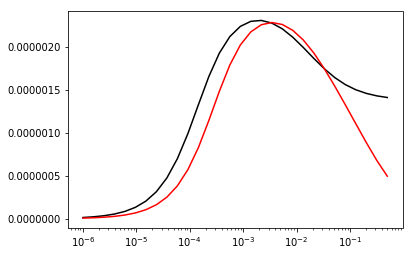

In [156]:
plt.plot(noise_levels, [mutator_single_mut(2,genotype_names_2, results_two_mrates[6][sr]['pop']) for sr in range(len(noise_levels))], c = 'k')
plt.plot(noise_levels, [mutator_single_mut(3,genotype_names_3, results_msb[6][sr]['pop']) for sr in range(len(noise_levels))], c = 'r')
plt.xscale('log')

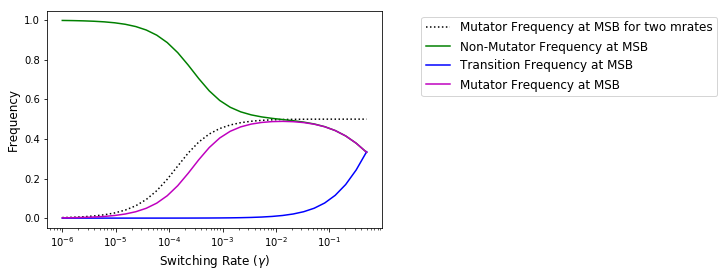

In [193]:
plt.plot(noise_levels, [pM(1,genotype_names_2, results_two_mrates[6][sr]['pop']) for sr in range(len(noise_levels))], c = 'k', linestyle = 'dotted')
plt.plot(noise_levels, [pM(0,genotype_names_3, all_delta[0.99][6][sr]['pop']) for sr in range(len(noise_levels))], c = 'g')
plt.plot(noise_levels, [pM(1,genotype_names_3, all_delta[0.99][6][sr]['pop']) for sr in range(len(noise_levels))], c = 'b')
plt.plot(noise_levels, [pM(2,genotype_names_3, all_delta[0.99][6][sr]['pop']) for sr in range(len(noise_levels))], c = 'm')
plt.legend(['Mutator Frequency at MSB for two mrates', 'Non-Mutator Frequency at MSB', 'Transition Frequency at MSB', 'Mutator Frequency at MSB'], fontsize = 12, bbox_to_anchor = (1.1,1.))
plt.xlabel('Switching Rate ($\gamma$)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.xscale('log')
plt.savefig('Frequencies_mrates.jpg', dpi = 400)

In [2]:
0.995**(19*7)

0.5134164023722474

In [5]:
param_grid[6]

{'mu': 4.000000000000001e-05, 's': 0.03, 'tau': 10}